In [1]:
# I am gonna to use this data to do two tasks:
#     a) Compare prices by region by looking at Airbnb on a New York City map.
#     b) Analyze whether there is a difference in price by room type.

# Data Source: Taken from kaggle, link:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/tasks?taskId=2712

In [2]:
#import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import folium as fl
from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

In [3]:
%matplotlib inline
sns.set(rc = {'figure.figsize': (20,8)}, style = 'whitegrid', palette = 'Set2')

In [4]:
# Import the data from the files 
df = pd.read_csv(r'C:\Users\ryanfzhang\Desktop\aribnb data\AB_NYC_2019.csv')

In [5]:
# Take a look at this dataset
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
# check the rows and columns of the dataset
df.shape


(48895, 16)

In [7]:
#check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# explore the categories for 'neighbourhood_group'
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
# explore the categories for 'neighbourhood'
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
Fort Wadsworth           1
Woodrow                  1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [10]:
# explore the categories for 'room_type'
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [11]:
df.drop(columns = ['id','name'], axis = 1, inplace = True)

In [12]:
df.rename(columns = {
            'calculated_host_listings_count': 'host_listings_count',
    'number_of_reviews': 'reviews_count'
},inplace = True)

In [13]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
# check the duplicates
df.duplicated().value_counts()
# no duplicate rows from results above

False    48895
dtype: int64

In [15]:
#double check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              48895 non-null  int64  
 1   host_name            48874 non-null  object 
 2   neighbourhood_group  48895 non-null  object 
 3   neighbourhood        48895 non-null  object 
 4   latitude             48895 non-null  float64
 5   longitude            48895 non-null  float64
 6   room_type            48895 non-null  object 
 7   price                48895 non-null  int64  
 8   minimum_nights       48895 non-null  int64  
 9   reviews_count        48895 non-null  int64  
 10  last_review          38843 non-null  object 
 11  reviews_per_month    38843 non-null  float64
 12  host_listings_count  48895 non-null  int64  
 13  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


In [16]:
# convert the date field 
df['last_review '] = pd.to_datetime(df['last_review'],format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   host_id              48895 non-null  int64         
 1   host_name            48874 non-null  object        
 2   neighbourhood_group  48895 non-null  object        
 3   neighbourhood        48895 non-null  object        
 4   latitude             48895 non-null  float64       
 5   longitude            48895 non-null  float64       
 6   room_type            48895 non-null  object        
 7   price                48895 non-null  int64         
 8   minimum_nights       48895 non-null  int64         
 9   reviews_count        48895 non-null  int64         
 10  last_review          38843 non-null  object        
 11  reviews_per_month    38843 non-null  float64       
 12  host_listings_count  48895 non-null  int64         
 13  availability_365     48895 non-

In [17]:
#inspect the summary of numerical columns
df.describe().round(2)

##need to look further into max of 'minimum_nights' and min of 'availability_365

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [18]:
#check for null values
df.isnull().sum()

host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
reviews_count              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
last_review            10052
dtype: int64

# 2 Data Clean and Processing 

In [19]:
# check if we can impute the missing host_name values from their other listdings
df[df['host_id'].isin(df[df['host_name'].isnull()]['host_id'])]

## seems like those who have multiple listings, still have the host_name missing for those too. We assume its for privacy. 
# 'host_id' column can be used instead for identification

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
360,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88,2019-07-08
2700,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342,2017-01-02
5745,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359,2019-05-23
6075,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0,NaT
6582,24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0,2015-10-20
8163,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318,2019-06-19
8257,33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0,2015-07-01
8852,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342,2019-06-19
9138,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0,NaT
9817,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0,2015-08-01


In [20]:
# drop 'host_name' column as we can use 'host_id' for identification/uniqueness

df.drop(columns = 'host_name',axis = 1, inplace = True)

In [21]:
# investigate on null values for 'last_review' & 'reviews_per_month'

df[df['last_review'].isnull() | df['reviews_per_month'].isnull()]
# rows of 'last_review' have nan, and reviews_per_month have nan as well


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaT
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249,NaT
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0,NaT
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,NaT
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaT
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaT
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaT
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaT


In [22]:
# check if all these entries have 0 reviews 
df[(df['last_review'].isna()) | (df['reviews_per_month'].isna())].reviews_count.value_counts()

## reason for having NA, is because these listings never got a single review yet

0    10052
Name: reviews_count, dtype: int64

In [23]:
# for NaN 'reviews_per_month', we can impute it with '0' as these listings didnt get any reviews yet
df.reviews_per_month.fillna(value = 0, inplace = True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   host_id              48895 non-null  int64         
 1   neighbourhood_group  48895 non-null  object        
 2   neighbourhood        48895 non-null  object        
 3   latitude             48895 non-null  float64       
 4   longitude            48895 non-null  float64       
 5   room_type            48895 non-null  object        
 6   price                48895 non-null  int64         
 7   minimum_nights       48895 non-null  int64         
 8   reviews_count        48895 non-null  int64         
 9   last_review          38843 non-null  object        
 10  reviews_per_month    48895 non-null  float64       
 11  host_listings_count  48895 non-null  int64         
 12  availability_365     48895 non-null  int64         
 13  last_review          38843 non-

In [26]:
df.last_review = df.last_review.astype('object')
df.last_review.fillna(value = 'Never', inplace = True)

# # to deal with NA in 'last_review', we change the column to a categorical variable (by year), and those that have NA will be categorised as 'Never', as they did not get any reviews yet

In [27]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,NaT
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Never,0.00,2,9,NaT
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Never,0.00,2,36,NaT
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Never,0.00,1,27,NaT
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Never,0.00,6,2,NaT


In [28]:
# check 'last_review' categories
df['last_review'].value_counts()

Never         10052
2019-06-23     1413
2019-07-01     1359
2019-06-30     1341
2019-06-24      875
              ...  
2015-03-13        1
2012-11-10        1
2014-03-28        1
2014-04-02        1
2018-03-29        1
Name: last_review, Length: 1765, dtype: int64

In [29]:
# confirm all null values are dealt with
df.isnull().sum()

host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
reviews_count              0
last_review                0
reviews_per_month          0
host_listings_count        0
availability_365           0
last_review            10052
dtype: int64

In [30]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,NaT
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19


In [31]:
# check the numerical stats of this dataset
df.describe()
# I am gonna check the futher info of 'min_nights' and  'availability_365' 

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [32]:
# first of all, check the 'avability_365'
df['availability_365'].value_counts()

#  we could get that 0-day could because of the listing not be availble, so this data can be retained

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [33]:
#check values for 'minimum_nights'
df.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
85         1
182        1
39         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

D:\Users\ryanfzhang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

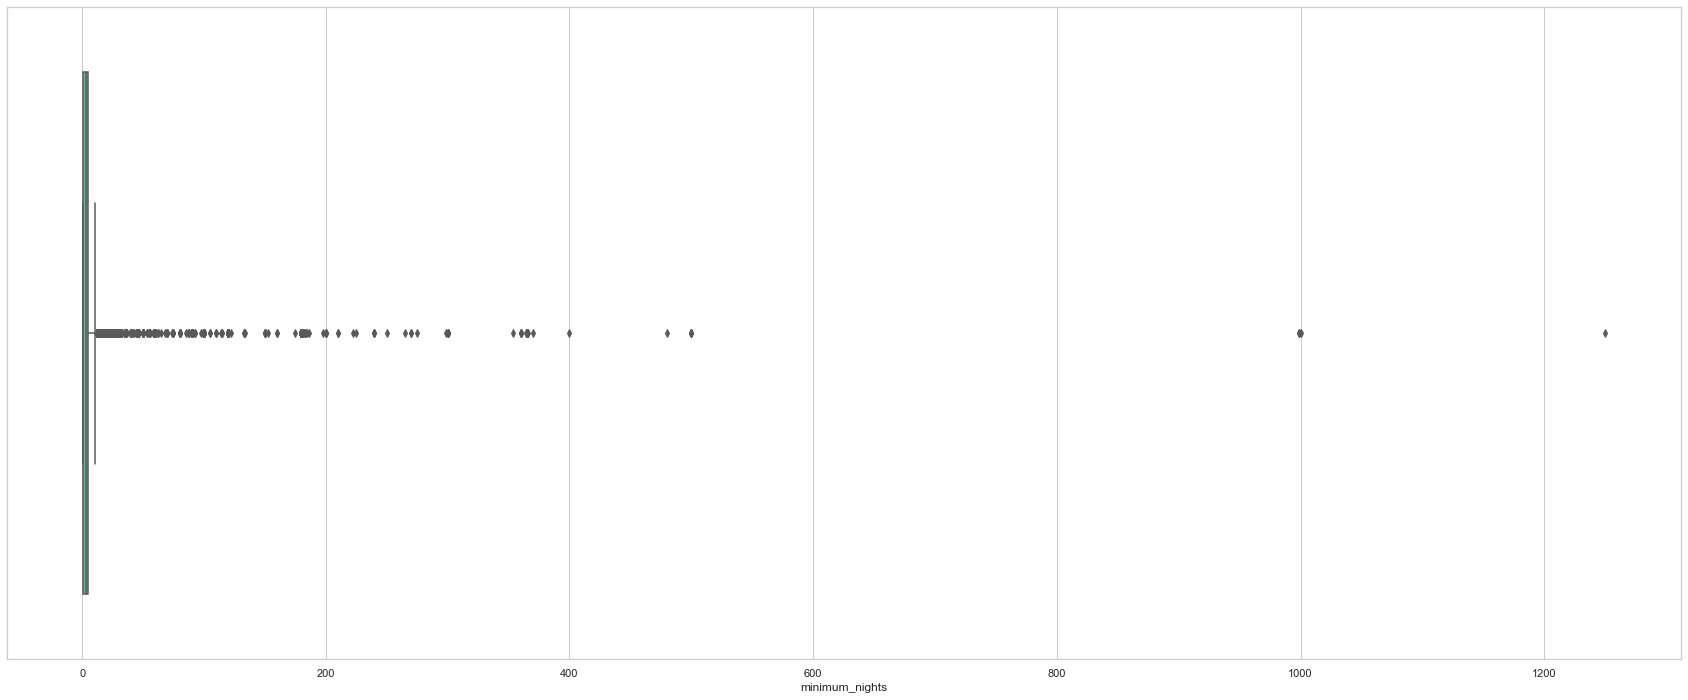

In [34]:
# check the outliers

plt.figure(figsize = (30,12) )
sns.boxplot(df['minimum_nights'])

In [35]:
#check how many listings have minimum nights set to more than a year
df[df['minimum_nights'] > 365]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
1305,2798644,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365,2018-04-15
2854,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,Never,0.00,1,362,NaT
5767,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365,2014-11-09
7355,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90,2018-06-24
8014,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,Never,0.00,1,362,NaT
10829,43945071,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,Never,0.00,1,365,NaT
11193,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365,2016-09-22
13404,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42,2018-01-04
14285,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,Never,0.00,1,358,NaT
15946,16476167,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,Never,0.00,1,365,NaT


In [36]:
# min_nights which are greater than 365-day per year is quite wierd, so we can remove it
df = df[df['minimum_nights'] <= 365]

In [37]:
df['host_listings_count'] = df.groupby(by = 'host_id')['host_id'].transform('count')

df.reset_index(inplace = True)

<ipython-input-37-1bdf50a0a8d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_listings_count'] = df.groupby(by = 'host_id')['host_id'].transform('count')


In [38]:
df

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,NaT
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48876,48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Never,0.00,2,9,NaT
48877,48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Never,0.00,2,36,NaT
48878,48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Never,0.00,1,27,NaT
48879,48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Never,0.00,6,2,NaT


D:\Users\ryanfzhang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

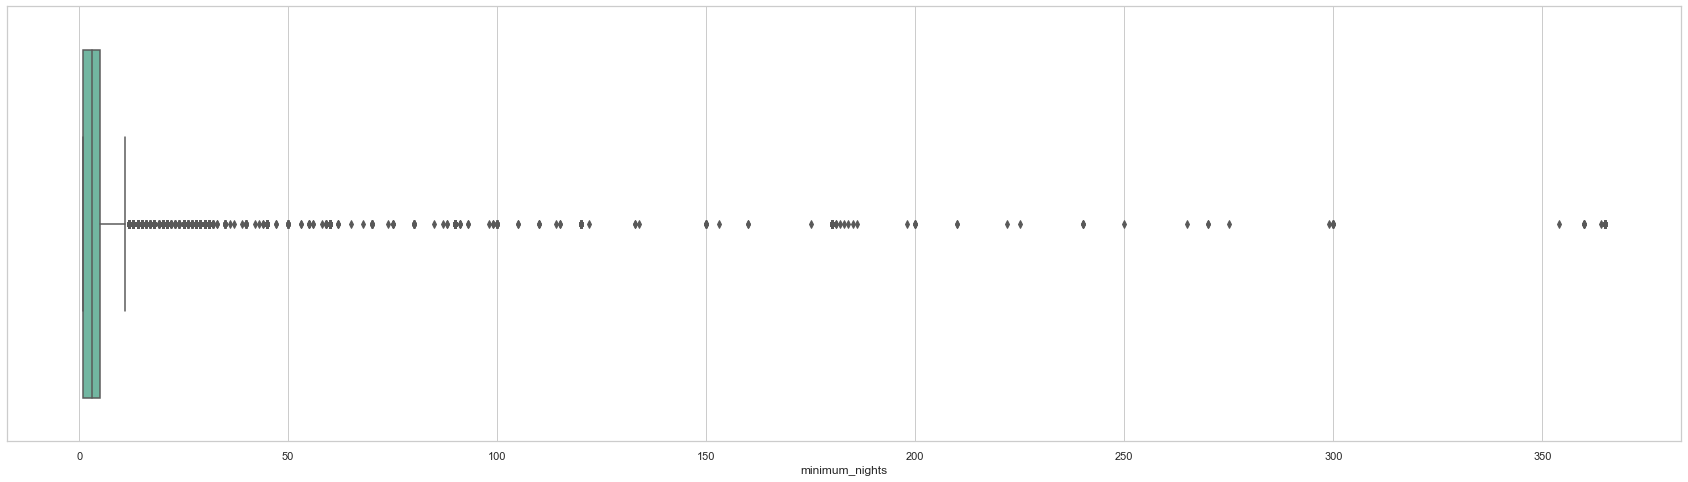

In [39]:
# extreme outliers have been removed, while the moderate outliers are kept, as they are valid but uncommon cases
plt.figure(figsize = (30, 8))
sns.boxplot(df['minimum_nights'])

In [40]:
# now things look better
df.describe().round(2)

,index,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,48881.00,4.888100e+04,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00
mean,24449.13,6.762783e+07,40.73,-73.95,152.73,6.84,23.28,1.09,7.15,112.73
std,14114.46,7.861435e+07,0.05,0.05,240.18,16.45,44.56,1.60,32.96,131.59
min,0.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,12227.00,7.822898e+06,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,24450.00,3.080195e+07,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,36672.00,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,48894.00,2.743213e+08,40.91,-73.71,10000.00,365.00,629.00,58.50,327.00,365.00


# 3. EDA


In [41]:
df.minimum_nights.value_counts().sort_values(ascending = False).head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

In [42]:
# create a new column, for categorising the minimum nights
min_night_type = []

for row in range(len(df)):
    if df.minimum_nights[row] <=5:
        min_night_type.append('1-day -- 5-day')
    elif df.minimum_nights[row] <=14:
        min_night_type.append('1 week -- 2 weeks')
    elif df.minimum_nights[row] <=90:
        min_night_type.append('1 month -- 3 months')
    elif df.minimum_nights[row] <=180:
        min_night_type.append('4 months -- 6 months')
    else:
         min_night_type.append('7 months -- 12 months')

In [43]:
# add this column to the dataframe
df['min_night_type'] = min_night_type
df.head()

<ipython-input-43-681d2ee5b260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_night_type'] = min_night_type


,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,last_review,min_night_type
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19,1-day -- 5-day
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21,1-day -- 5-day
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,NaT,1-day -- 5-day
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05,1-day -- 5-day
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19,1 week -- 2 weeks


<AxesSubplot:>

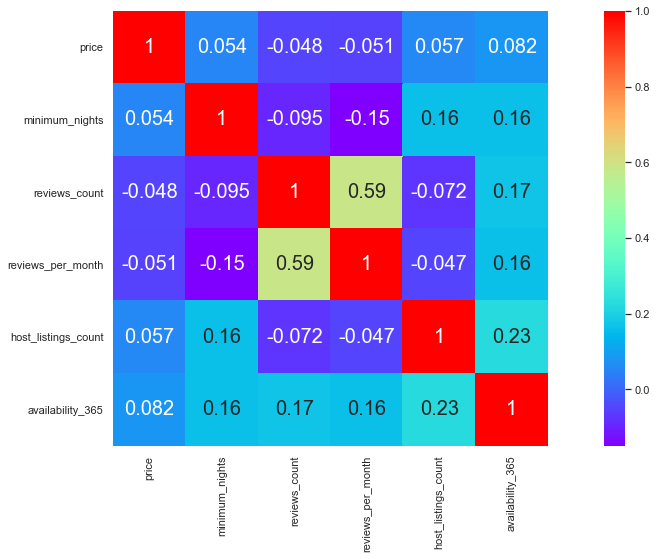

In [44]:
# get correlation matrix for numerical columns and draw the heatmap
df_corr = df[['price', 'minimum_nights', 'reviews_count', 'reviews_per_month', 'host_listings_count', 'availability_365']].corr()

sns.heatmap(df_corr, annot = True, annot_kws = {'size': 20}, square = True, cmap = 'rainbow' )

# from this observation, we can conclude that most of the numerical features do not really have strong correlations with each other directly, apart from review count & rate.

In [45]:
# I am going to create a function and it will be reused to draw the map
# visualize the amount of listing clusters in New York City(Named NYC below)
def draw_map():
    nyc = [df.latitude.mean(), df.longitude.mean()]
    boroughs = df.groupby('neighbourhood_group').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(location = nyc, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'fill': 'midnightblue', 'font-weight': 'bold', 'font-size': '20'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))
    
    return base_map

base_map = draw_map()    
base_map.add_child(HeatMap(data = df[['latitude', 'longitude']], min_opacity = 0.2, radius = 15, blur = 40))
base_map.add_child(fl.ClickForMarker(popup='High amount of listings'))

# ## Manhattan and Brooklyn have the most amount of listing options availabl


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

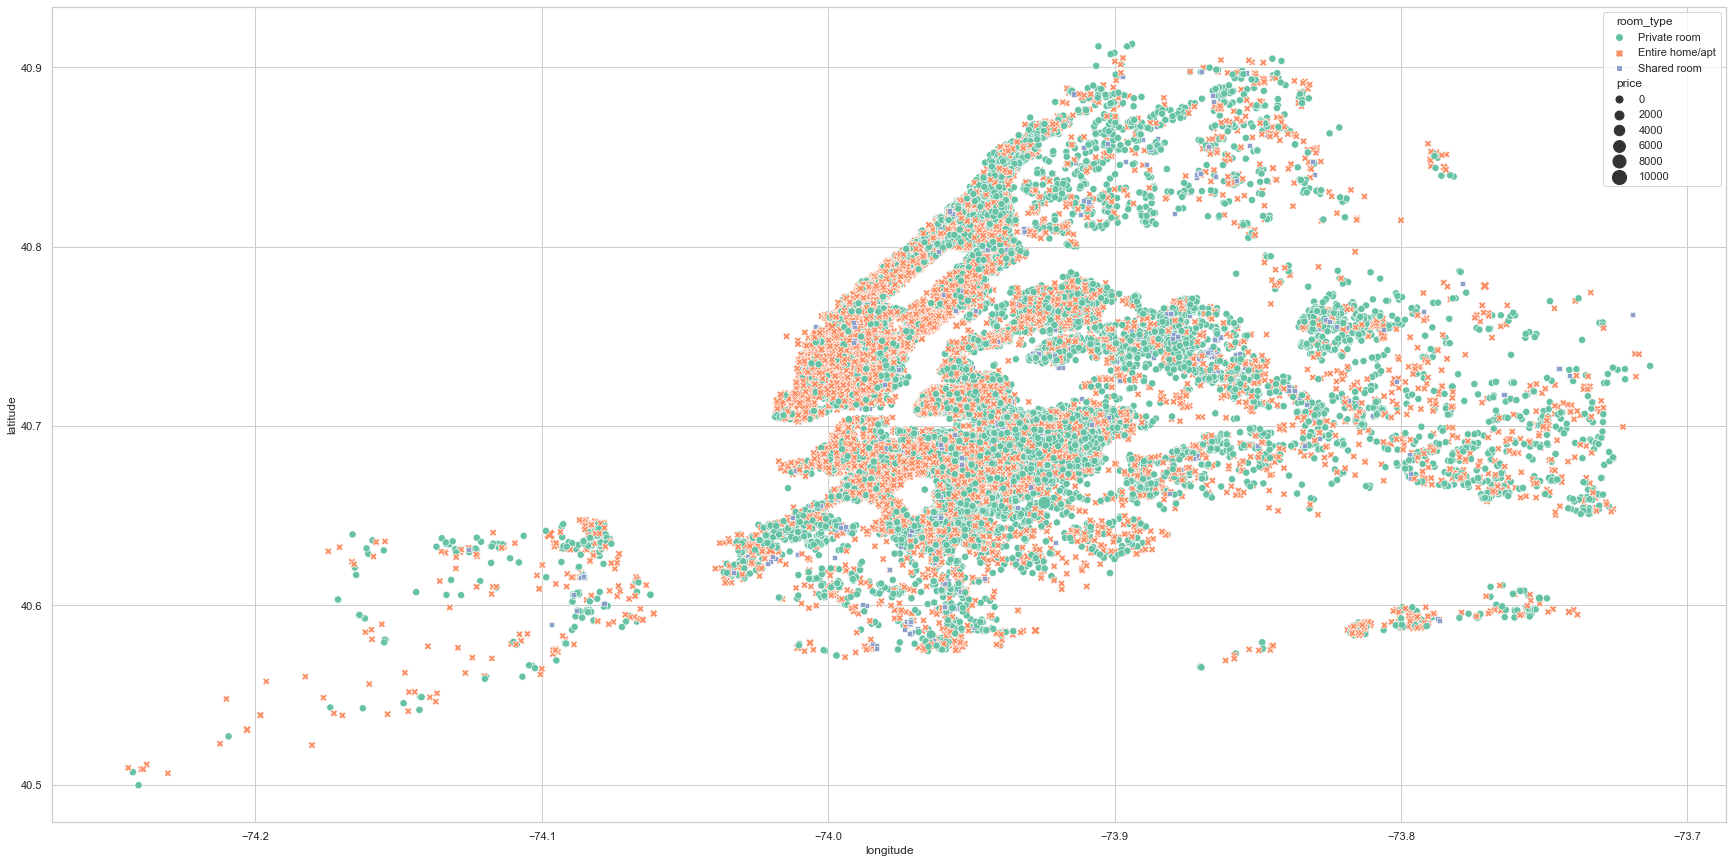

In [46]:
# view the cluster of room types available
# folium visual map is not used as the cluster colours blend, preventing from differentiating the room types

plt.figure(figsize = (30, 15))
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'room_type', size = 'price', sizes = (50, 200), style = 'room_type')

## There are very few shared rooms available compared to private rooms & entire home

<AxesSubplot:xlabel='neighbourhood_group', ylabel='reviews_count'>

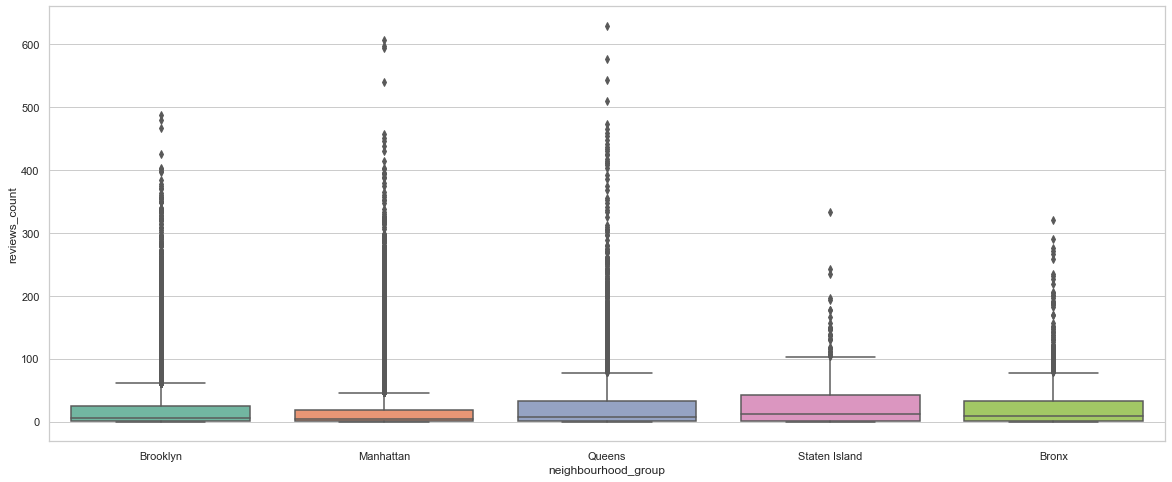

In [47]:
# check if 'review_counts' have many outliers
sns.boxplot(x = 'neighbourhood_group', y = 'reviews_count', data = df)

## has many outliers

In [48]:
# since 'review_counts' have many outliers, we should use median instead of mean as the measure of central tendency.
top_listings = df.groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()


In [49]:
top10_listings = df.groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)


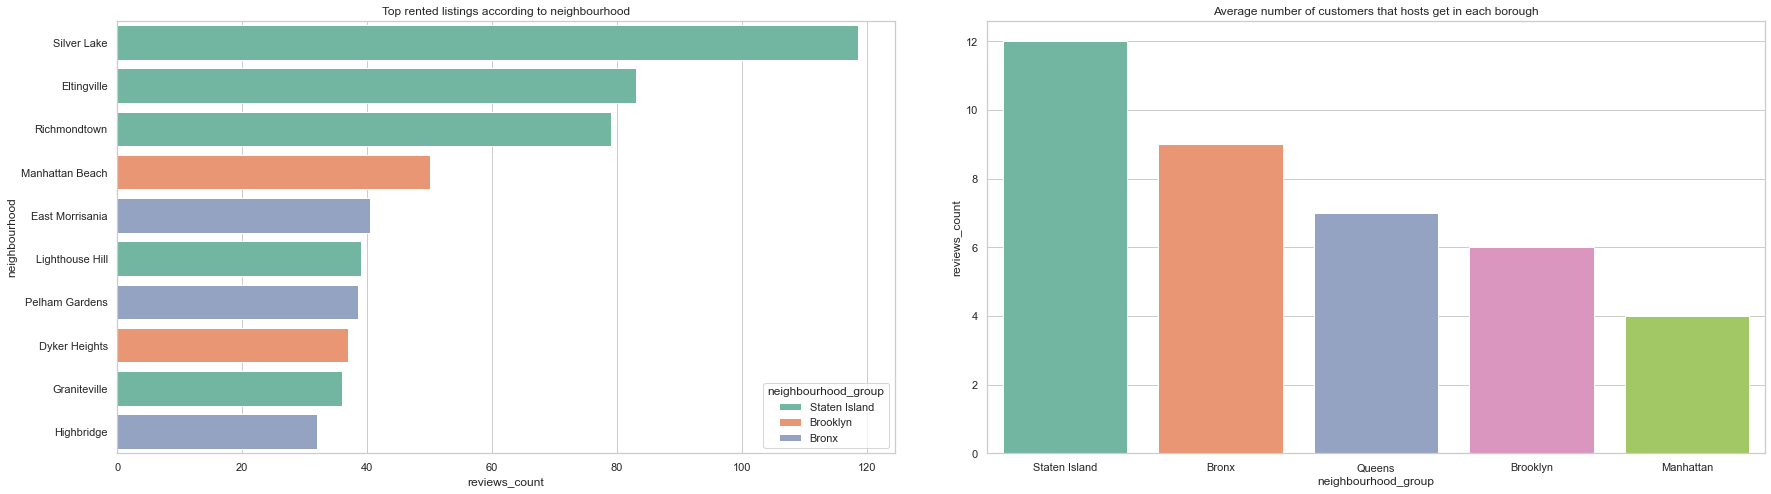

In [50]:
fig, axis = plt.subplots(1, 2, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, ci = False, dodge = False, ax = axis[1]).set(title = 'Average number of customers that hosts get in each borough')
plt.show()

## From the below observations, we can conclude that hosts in Staten Island are the most busy, in terms of getting customers
## Silver Lake, Eltingville and Richmondtown seems to be the top 3 hotspots for hosts to get many customers


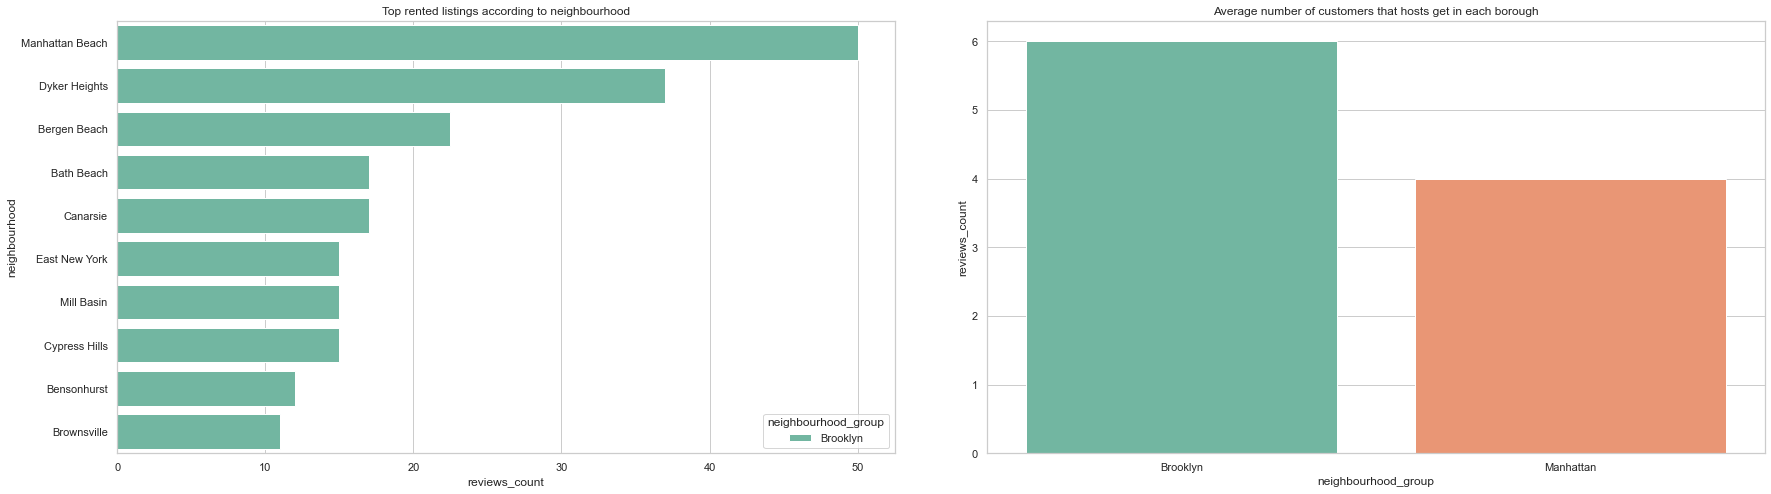

In [51]:
# Investigate which hosts in Manhattan & Brooklyn have the most customers as they have the highest amount of listing options

top_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()
top10_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, ci = False, dodge = False, ax = axis[1]).set(title = 'Average number of customers that hosts get in each borough')
plt.show()

# Brooklyn hosts tops this one, with Manhattan Beach, Dyker Heights & Bergen Beach being the common locations

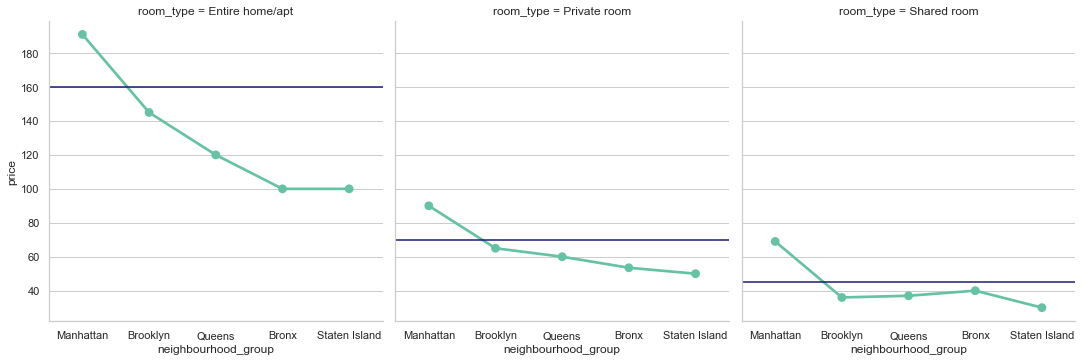

In [52]:
# inspect the price differences for each borough
avg_roomtype_cost = df.groupby('room_type').price.median()
top_price = df.groupby(['neighbourhood_group', 'room_type']).median().sort_values(by = 'price', ascending = False).reset_index()

g = sns.catplot(x = 'neighbourhood_group', y = 'price', data = top_price, ci = False, estimator = np.median, kind = 'point', col = 'room_type')

for i in range(len(avg_roomtype_cost)):
    g.axes[0][i].axhline(avg_roomtype_cost[i], color = 'midnightblue')

plt.show()

# as we can see, Manhattan has the most expensive listing offers for all room_types
# on the other hand, Staten Island has the cheapest listings. This further reinforces the previous observations we made as to why each Staten Island hosts get alot of customers.

In [53]:
# aggregate to view and compare the listings count with reviews count. View rental rate as well.
host_count = df.groupby('neighbourhood_group').count().sort_values('index', ascending = False).reset_index()[['neighbourhood_group', 'index']].rename(columns = {'index': 'listings_count'})
customer_count = df.groupby('neighbourhood_group').sum().sort_values('reviews_count', ascending = False).reset_index()[['neighbourhood_group', 'reviews_count']]
borough_data = host_count.merge(customer_count, left_on = 'neighbourhood_group', right_on = 'neighbourhood_group', how = 'left')
borough_data['rental_rate'] = (borough_data.reviews_count / borough_data.listings_count).round(2)
borough_data

,neighbourhood_group,listings_count,reviews_count,rental_rate
0,Manhattan,21655,454565,20.99
1,Brooklyn,20098,486534,24.21
2,Queens,5664,156920,27.70
3,Bronx,1091,28371,26.00
4,Staten Island,373,11541,30.94


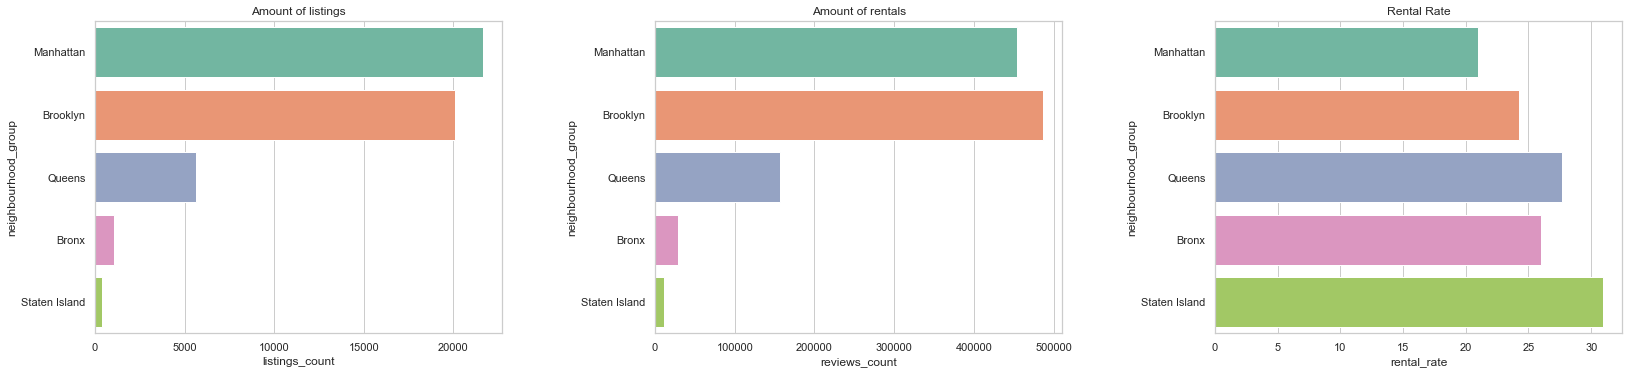

In [54]:
# visualise the comparison for listings and reviews
fig, axis = plt.subplots(1, 3, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 10)

sns.barplot(x = 'listings_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[0]).set(title = 'Amount of listings')
sns.barplot(x = 'reviews_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[1]).set(title = 'Amount of rentals')
sns.barplot(x = 'rental_rate', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[2]).set(title = 'Rental Rate')
plt.show()

## As seen earlier, Manhattan & Brooklyn has more listings, but as we look at the rental rate. In average, Staten Island & Queens hosts are able to secure customers at a better rate compared to the other boroughs.

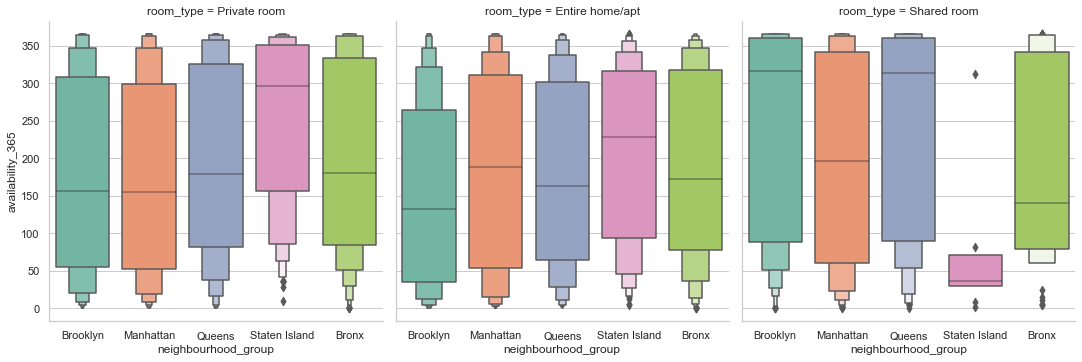

In [55]:
# inspect the availability of listings according to each borough and room type

sns.catplot(x = 'neighbourhood_group', y = 'availability_365', data = df.loc[df['availability_365'] > 0], ci = False, estimator = np.median, kind = 'boxen', col = 'room_type')

## For private rooms, most Staten Island listings have them available throughout the whole year compared to the other boroughs.
## Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.
## For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.

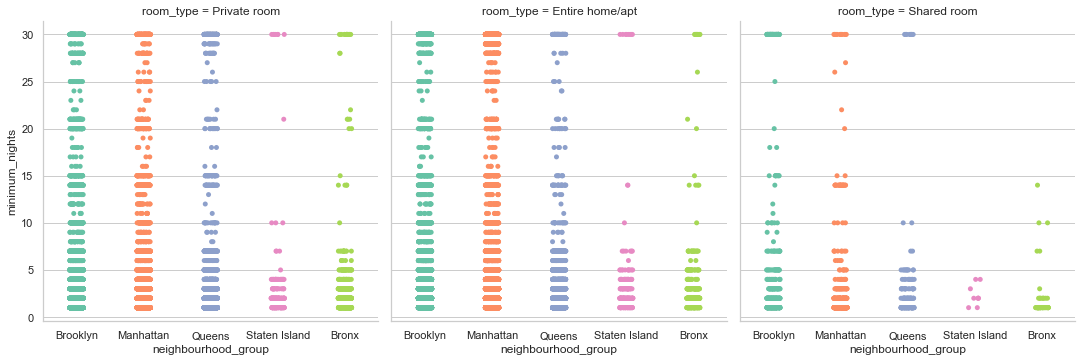

In [56]:
# inspect the minimum nights for listings in terms of room type and borough
# consider those that are 30 days or less, since higher is more uncommon in general
sns.catplot(x = 'neighbourhood_group', y = 'minimum_nights', data = df.loc[df['minimum_nights'] <= 30], ci = False, estimator = np.median, kind = 'strip', col = 'room_type')

## Staten Island listings tend to have very low minimum night requirements, which means that many vistors do not have to stay for long.


<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

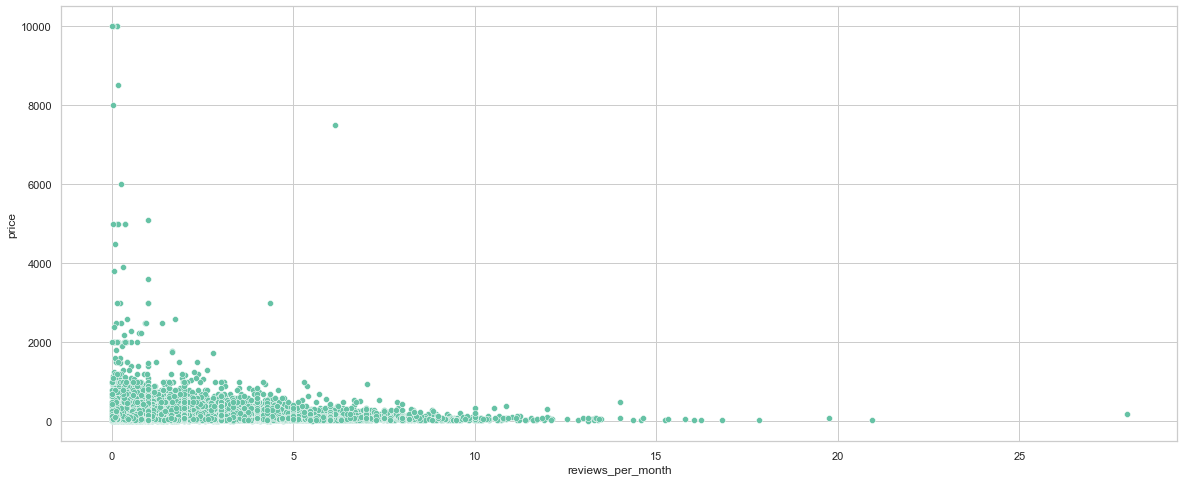

In [57]:
# view the trend for reviews per month against price. Ignore rates above 30 as they could potentially be invalid.

sns.scatterplot(x = 'reviews_per_month', y = 'price', data = df.loc[(df['reviews_count'] > 0) & (df['reviews_per_month'] <= 30)].sort_values('reviews_count', ascending = False))

# exponential trend where extreme high prices have a very low review rate while lower prices have a variety of rates.


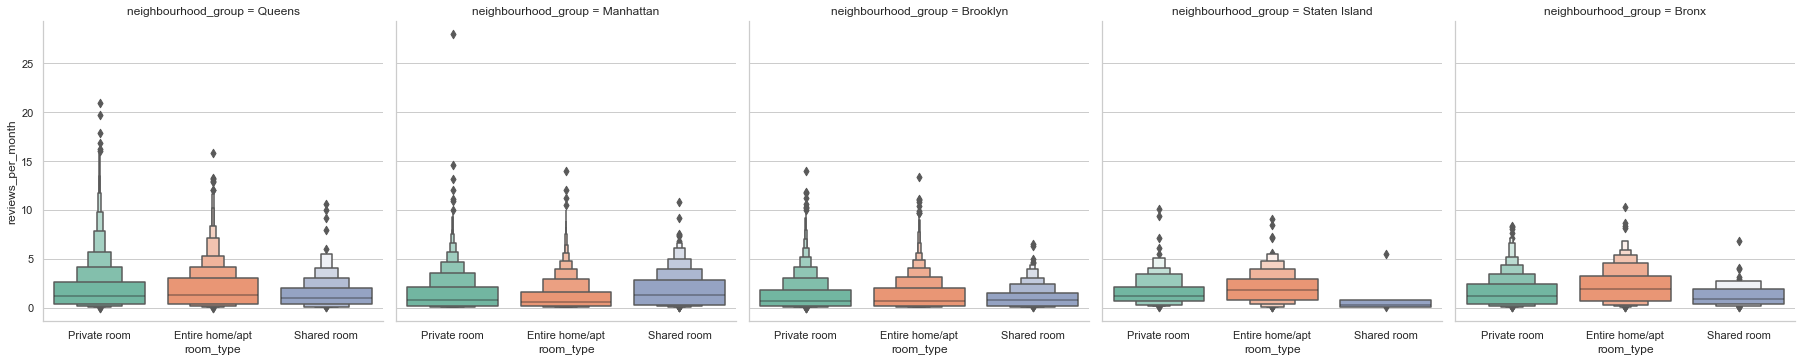

In [58]:
# inspect the review rate for each room type in the different boroughs

sns.catplot(x = 'room_type', y = 'reviews_per_month', data = df.loc[(df.reviews_count > 0) & (df.reviews_per_month <= 30)].sort_values('reviews_count', ascending = False), ci = False, estimator = np.median, kind = 'boxen', col = 'neighbourhood_group')

## Althoough Manhattan has alot of private rooms & entire homes available, many people tend to opt for the shared rooms.
## Entire homes seem to be the go to option for most visitors in Staten Island and Bronx.